<a href="https://colab.research.google.com/github/abdulsamadkhan/HayStack/blob/main/haystack_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🌟 Introduction to Haystack 🌟

**Haystack** is an **open-source framework** designed for building powerful, production-ready search systems using **natural language processing (NLP)**. In this tutorial, we will create a **document search pipeline** leveraging the core abstractions of Haystack: **components** and **pipelines**.

---

## 📚 What You’ll Learn

1. **Components Overview**  
   🧩 What is a component?  
   💡 Example of a component in Haystack.

2. **Understanding Pipelines**  
   🔗 What is a pipeline?  
   🛠️ Types of pipelines you can create in Haystack.

3. **Building an Indexing Pipeline**  
   📥 Step-by-step guide to creating an indexing pipeline using available components.  
   🔌 How to add and connect components effectively.

4. **Developing a Retrieving Pipeline**  
   ✨ Bringing it all together by creating a retrieving pipeline with your components.

---

**Let’s get started and unlock the power of Haystack together!** 🚀



In [1]:
#instaslling some required libraries
!pip install haystack-ai==2.2.4
!pip install haystack-experimental==0.1.0
!pip install sentence-transformers>=2.2.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.8 MB/s eta 0:00:00


#  🧩 1. Components

The image below illustrates a typical **pipeline** that involves **retrieval** and **generation** in the context of a large language model (LLM)-based question-answering system.

<div align="center">
    <img src="https://files.readme.io/00f5fe8-Pipeline_Illustrations_2.png" width="500" alt="Pipeline Illustration">
</div>

## 🧩 What Are Components?

In Haystack, these basic building blocks—such as **retrievers** and **generators**—are referred to as **components**. Every complex system consists of these fundamental abstraction units.

### 🔍 Common Components Include:
- **Retriever**: Fetches relevant documents from various document stores (e.g., Elasticsearch, Pinecone).
- **Generator**: Utilizes the retrieved documents to formulate answers based on the query.
- **Ranker**: Ranks the retrieved documents to enhance result relevance.
- **Embedder**: Converts documents and queries into embeddings for better search capabilities.
- **Preprocessor**: Prepares raw data for ingestion into the pipeline.

> **Note**:   

To connect components in a pipeline, you need to know the names of the inputs and outputs they accept. The output of one component must be compatible with the input the subsequent component accepts. For example, to connect Retriever and Ranker in a pipeline, you must know that the Retriever outputs
documents and the Ranker accepts documents as input.







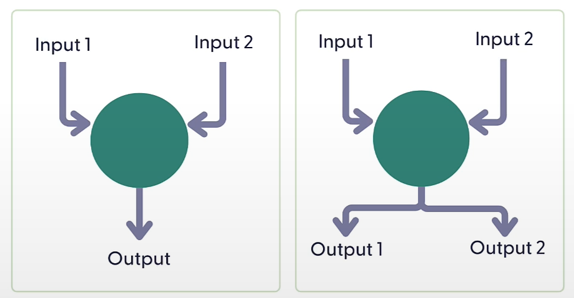


### 💡 Example:
  

In [2]:
# Import necessary classes from Haystack
from haystack.dataclasses import Document  # Document class represents a text document.
from haystack.components.embedders import SentenceTransformersDocumentEmbedder  # Import the SentenceTransformer-based embedder.

# Step 1: Initialize the document embedder component
# The SentenceTransformersDocumentEmbedder is used to convert documents into embeddings (numerical representations)
embedder = SentenceTransformersDocumentEmbedder()

# Step 2: Warm up the embedder
# Loading the model into memory to ensure it's ready for processing without delay during actual embedding
embedder.warm_up()

# Step 3: Prepare the documents to be embedded
# Here we create a list of Document objects, where each Document contains a piece of content (text data)
documents = [
    Document(content="Haystack is an open source AI framework to build full AI applications in Python"),
    Document(content="You can build AI Pipelines by combining Components"),
]

# Step 4: Generate embeddings for the documents
# The 'run' method processes the list of documents and returns embeddings for each document
result = embedder.run(documents=documents)

# Step 5: Access and display results
# Print the content of the first document
print(result['documents'][0].content)

# Print the first 10 elements of the embedding for the first document (for brevity)
print(result['documents'][0].embedding[0:10])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Haystack is an open source AI framework to build full AI applications in Python
[-0.022557029500603676, 0.05266721546649933, -0.005950575694441795, -0.010160533711314201, -0.017666107043623924, 0.01306497398763895, 0.023242909461259842, -0.01629345677793026, 0.02512843906879425, 0.022877389565110207]




# 🚀 2. Pipeline

The **Pipeline** is the second important architecture in Haystack. It is formed by combining components to achieve a specific objective, such as indexing, querying, summarization, and more.

## 🔗 Illustrative Examples of Pipelines

#### 1. **Pipeline with Branching**  
This type of pipeline allows multiple paths of execution, demonstrating how different components can work simultaneously.

<div align="center">
    <img src="https://files.readme.io/83f686b-Pipeline_Illustrations_1_1.png" width="500" alt="Pipeline with Branching">
</div>

---

#### 2. **Pipeline with Loops**  
In this example, the pipeline incorporates loops, allowing for iterative processing of components.

<div align="center">
    <img src="https://files.readme.io/2390eea-Pipeline_Illustrations_1_2.png" width="500" alt="Pipeline with Loops">
</div>

---

These illustrations highlight the flexibility and complexity of pipelines in Haystack, showcasing how various components can be connected to achieve different functionalities.





# 🔄 3. IndexPipelineing

we will now create an **indexing pipeline**.

## 3.1 **Import Dependencies**  
Start by importing all necessary dependencies, such as `pipeline`, `documents`, `Document Store`, and the components you want to include in your pipeline.



In [3]:

# Import Pipeline, a key class in Haystack for organizing the flow of operations
from haystack import Pipeline

# InMemoryDocumentStore stores documents in memory. It’s useful for small datasets or testing.
from haystack.document_stores.in_memory import InMemoryDocumentStore

# TextFileToDocument component is used to convert plain text files into Haystack Document objects.
from haystack.components.converters.txt import TextFileToDocument

# DocumentSplitter is used to split longer documents into smaller chunks.
# This is often done to handle large texts more efficiently for tasks like embedding or search.
from haystack.components.preprocessors.document_splitter import DocumentSplitter

# SentenceTransformersDocumentEmbedder converts text documents into numerical embeddings using pre-trained transformer models.
# These embeddings can be used for similarity search or other NLP tasks.
from haystack.components.embedders import SentenceTransformersDocumentEmbedder

# DocumentWriter is used to write documents back to a file or other formats after processing.
# Useful for saving processed or enriched documents.
from haystack.components.writers import DocumentWriter


## 3.2 **Initialize Components**  

Initialize all the components and pass the parameters if needed.


In [4]:


# Initialize an in-memory document store
# This will store documents and their embeddings in memory, useful for testing or small-scale operations.
document_store = InMemoryDocumentStore()

# Initialize a converter to transform text files into Document objects
# This is used to load plain text files and convert them into the Haystack Document format.
converter = TextFileToDocument()

# Initialize a document splitter
# The splitter is used to break up larger documents into smaller chunks for easier processing.
# This can be important when dealing with long texts that need to be handled in manageable parts.
splitter = DocumentSplitter()

# Initialize the SentenceTransformers-based document embedder
# This component converts documents into numerical embeddings using a pre-trained transformer model.
# These embeddings can be used for tasks like semantic search or document similarity.
embedder = SentenceTransformersDocumentEmbedder()

# Initialize a document writer, which will save documents (potentially with their embeddings)
# In this case, the writer is configured to save the processed documents into the document store.
writer = DocumentWriter(document_store=document_store)



## 3.3 **Create Pipeline**  

Now, create the indexing pipeline by combining the initialized components. This will allow you to structure the flow of data and processes as required for your specific use case.

In [5]:
# Initialize an empty indexing pipeline
# A pipeline in Haystack is a way to organize a series of components that work together in sequence.
# By default, the pipeline is empty, and you can add steps to it.
indexing_pipeline = Pipeline()


## 3.4 **Add Components** ➕

Add components to the pipeline one by one.


In [6]:


# Add the 'converter' component to the indexing pipeline
# The converter will convert raw text files into Document objects that Haystack can process.
indexing_pipeline.add_component("converter", converter)

# Add the 'splitter' component to the pipeline
# The splitter will break large documents into smaller chunks.
indexing_pipeline.add_component("splitter", splitter)

# Add the 'embedder' component to the pipeline
# This component will generate embeddings (numerical representations) for the documents.
indexing_pipeline.add_component("embedder", embedder)

# Add the 'writer' component to the pipeline
# The writer saves the processed documents (with embeddings) into the document store.
indexing_pipeline.add_component("writer", writer)


## 3.5 **Connect Components** 🔗

Connect the components by indicating which output of a component should be connected to the input of the next component.


In [7]:


# Connect the 'converter' component to the 'splitter'
# This means the output of the converter (which converts text files to documents) will be fed as input to the splitter.
indexing_pipeline.connect("converter", "splitter")

# Connect the 'splitter' component to the 'embedder'
# The splitter will break the documents into smaller parts, and the output will be passed to the embedder for creating embeddings.
indexing_pipeline.connect("splitter", "embedder")

# Connect the 'embedder' component to the 'writer'
# The embedder generates embeddings, and the output will be stored by the writer in the document store.
indexing_pipeline.connect("embedder", "writer")


🚅 Components
  - converter: TextFileToDocument
  - splitter: DocumentSplitter
  - embedder: SentenceTransformersDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> embedder.documents (List[Document])
  - embedder.documents -> writer.documents (List[Document])

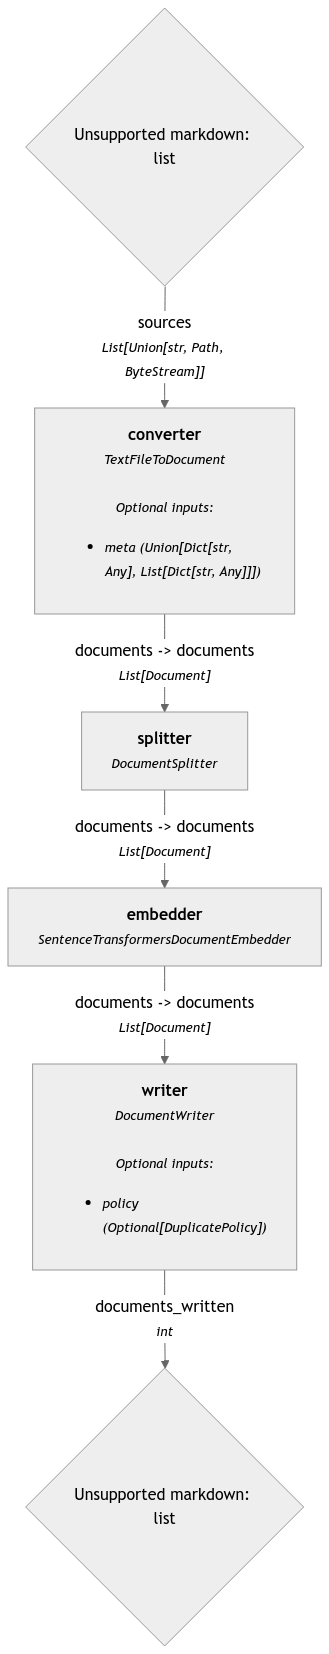

In [8]:
#When you use the command indexing_pipeline.show(), it will display a visual representation or a summary of the pipeline
# you've built, including the components and how they are connected.
#This is useful for verifying the structure and ensuring that all components are connected correctly in the proper sequence.
indexing_pipeline.show()

## 3.6 **Run the Pipeline** 🚀

To execute the indexing pipeline, use the following command:



In [11]:
#This tells the pipeline to start with the converter, reading from the file davinci.txt.
#The other components will process the output from the converter in sequence (split, embed, and write).
indexing_pipeline.run({"converter": {"sources": ['davinci.txt']}})


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

{'writer': {'documents_written': 47}}

In [12]:

# Retrieve documents from the document store
documents = document_store.filter_documents()

# nu,ber of documents
number_of_documents = len(documents)
print(f"Number of documents in the document store: {number_of_documents}")

# Access a specific document, for example, the 6th document (index 5)
document = documents[0]

# Print the content of the document
print("Content of the document:")
print(document.content[:50])

# Print the metadata of the document
print("\nMetadata of the document:")
print(document.meta)

# Print the ID of the document
print("\nID of the document:")
print(document.id)

# If the document has an embedding, you can print that too
if document.embedding is not None:
    print("\nEmbedding of the document:")
    print(document.embedding[:5])


Number of documents in the document store: 47
Content of the document:
﻿The Project Gutenberg eBook of Leonardo Da Vinci

Metadata of the document:
{'file_path': 'davinci.txt', 'source_id': 'a8a7df9a60231a346bf9d4751d89c49ae06c3d623676b76c7060376313a3d77c', 'page_number': 1}

ID of the document:
818e72f43bcfa24a78af0e669b935eba8d46d7005696a09a004c3663ce7d15dc

Embedding of the document:
[0.023255430161952972, 0.07814791053533554, -0.038499921560287476, 0.06791196763515472, -0.04961678013205528]


# ✨ 4. Developing a Retrieving Pipeline
  Bringing it all together by creating a retrieving pipeline with your components.


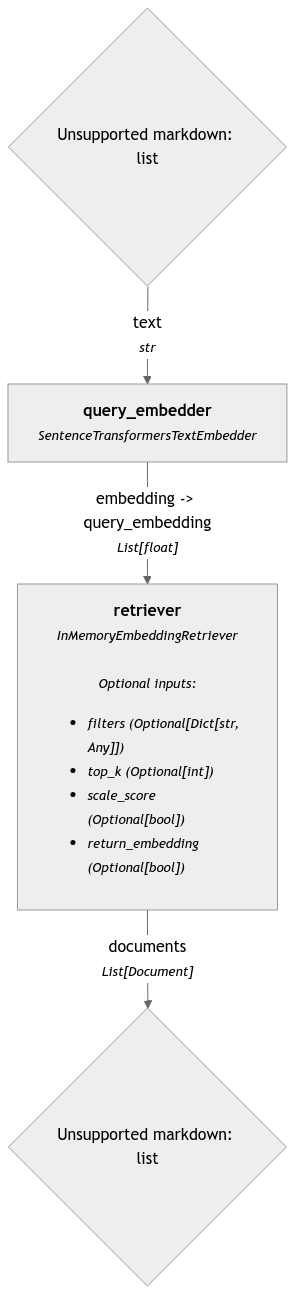

In [14]:


from haystack.components.embedders import SentenceTransformersTextEmbedder  # Import the SentenceTransformer-based embedder.

# Import the necessary retriever class for in-memory document retrieval
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

# Initialize the query embedder using a Sentence Transformers model
query_embedder = SentenceTransformersTextEmbedder()

# Set up the retriever to search for documents in the specified document store
retriever = InMemoryEmbeddingRetriever(document_store=document_store)

# Create a new pipeline for handling the document search process
document_search = Pipeline()

# Add the query embedder to the pipeline to process incoming queries
document_search.add_component("query_embedder", query_embedder)

# Add the retriever to the pipeline to retrieve relevant documents based on the query embedding
document_search.add_component("retriever", retriever)

# Connect the output of the query embedder (the query embedding) to the input of the retriever
document_search.connect("query_embedder.embedding", "retriever.query_embedding")

# Display the structure of the document search pipeline to verify the components and their connections
document_search.show()


## **Let Us Ask a Question ❓**

Now that we have set up our indexing pipeline and added documents, it's time to ask a question! This step will allow us to retrieve relevant answers based on the indexed data.


In [16]:
question = "How old was Davinci when he died?"

results = document_search.run({"query_embedder": {"text": question}})

for i, document in enumerate(results["retriever"]["documents"]):
    print("\n--------------\n")
    print(f"DOCUMENT {i}")
    #printing first 100 characters
    print(document.content[:100])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


--------------

DOCUMENT 0
CHRIST, AND ST. ANNE

In the Louvre. No. 1508. 5 ft. 7 in. h. by 4 ft. 3 in. w. (1.70 x
1.29)



--------------

DOCUMENT 1
to visit
him, rose and supported his head to give him such assistance and to do
him such favour as

--------------

DOCUMENT 2
 In the Louvre




HIS BIRTH

Leonardo Da Vinci, the many-sided genius of the Italian Renaiss

--------------

DOCUMENT 3
2.18)

Although this panel is included in the Uffizi Catalogue as being by
Leonardo, it is in all

--------------

DOCUMENT 4
the
workshop of that great Florentine sculptor, goldsmith, and artist he
met other craftsmen, meta

--------------

DOCUMENT 5
altar-piece for the Chapel of St. Bernardo in the Palazzo Vecchio,
and he was paid twenty-five flor

--------------

DOCUMENT 6
his Profession, so
accomplished in the Arts, so knowing in the Sciences, and withal, so
much estee

--------------

DOCUMENT 7
staircase in the Victoria and Albert Museum. It depicts the
Florentines under Cardinal Ludo

## **Return Only Top-K Answers 🔝**

In this step, we will configure the pipeline to return only the top-K answers to the questions asked. This allows us to focus on the most relevant results, enhancing the efficiency of our query responses.


In [17]:
question = "How old was Davinci when he died?"

results = document_search.run({"query_embedder": {"text": question},
                               "retriever": {"top_k": 3}})

for i, document in enumerate(results["retriever"]["documents"]):
    print("\n--------------\n")
    print(f"DOCUMENT {i}")
    #printing first 100 chars
    print(document.content[:100])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


--------------

DOCUMENT 0
CHRIST, AND ST. ANNE

In the Louvre. No. 1508. 5 ft. 7 in. h. by 4 ft. 3 in. w. (1.70 x
1.29)



--------------

DOCUMENT 1
to visit
him, rose and supported his head to give him such assistance and to do
him such favour as

--------------

DOCUMENT 2
 In the Louvre




HIS BIRTH

Leonardo Da Vinci, the many-sided genius of the Italian Renaiss


# Conclusion 🎉

By the end of this tutorial, we have learned about the components and pipelines in Haystack, and we created a pipeline that can be used to answer questions based on the indexed documents.

In the next tutorial, we will develop a customized RAG (Retrieval-Augmented Generation) pipeline.

See you in the next tutorial! 🤩🤩🤩


# Reference
1. https://docs.haystack.deepset.ai/docs/creating-pipelines
2. DeepLearnning.Ai
